In [ ]:
import numpy as np
np.random.seed(1)
import tensorflow as tf
tf.random.set_seed(2)

Bônus, visualizando ativações

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()
print(x_train.shape, y_train.shape, x_test.shape, y_test.shape)

#colocando no intervalo [0-1]
x_train = x_train/ 255.0
x_test = x_test/ 255.0

#aplicando o one-hot-encoding
y_train = tf.keras.utils.to_categorical(y_train, 10)
y_test = tf.keras.utils.to_categorical(y_test, 10)

#adcionando uma dimensão extra 
x_train = x_train.reshape(-1, 28, 28, 1)
x_test = x_test.reshape(-1, 28, 28, 1)
print(x_train.shape, y_train.shape, x_test.shape, y_test.shape)

4423680/4422102 [==============================] - 0s 0us/step
(60000, 28, 28) (60000,) (10000, 28, 28) (10000,)
(60000, 28, 28, 1) (60000, 10) (10000, 28, 28, 1) (10000, 10)


In [ ]:
tf.keras.backend.clear_session()
np.random.seed(1)
tf.random.set_seed(2)

input_layer = tf.keras.layers.Input(shape=(28, 28, 1))
conv1 = tf.keras.layers.Conv2D(32, kernel_size=(3,3), activation='relu')(input_layer)
pool1 = tf.keras.layers.MaxPooling2D(pool_size=(2,2))(conv1)
conv2 = tf.keras.layers.Conv2D(64, kernel_size=(3,3), activation='relu')(pool1)
flat = tf.keras.layers.Flatten()(conv2)
dense = tf.keras.layers.Dense(10, activation='softmax')(flat)

model = tf.keras.models.Model(input_layer, outputs=[dense])
print(model.summary())

model.compile(optimizer='sgd', loss='categorical_crossentropy', metrics='accuracy')

log = model.fit(x_train, y_train, batch_size=32, epochs=10, validation_split=0.2)

Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 28, 28, 1)]       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
flatten (Flatten)            (None, 7744)              0         
_________________________________________________________________
dense (Dense)                (None, 10)                77450     
Total params: 96,266
Trainable params: 96,266
Non-trainable params: 0
__________________________________________________

In [ ]:
print(f'Accuracy: {model.evaluate(x_test, y_test)[1]:.3f}')

313/313 [==============================] - 1s 2ms/step - loss: 0.3364 - accuracy: 0.8824
Accuracy: 0.882


In [ ]:
model2 = tf.keras.models.Model(input_layer, outputs=[conv1, pool1, conv2, dense])

In [ ]:
def normalize(activations):
  activations = np.rollaxis(activations, 2, 0)
  activations = (activations - np.min(activations))/(np.max(activations) - np.min(activations))*255
  print(np.max(activations), np.min(activations))

  return activations

(1, 28, 28, 1)


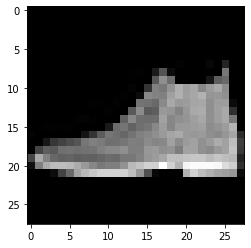

In [ ]:
query = x_test[0].reshape(1, 28, 28, 1)
print(query.shape)
plt.imshow(query.reshape(28,28), cmap='gray')

In [ ]:
outputs = model2.predict(query)
for layer_output in outputs:
  print(layer_output.shape)

(1, 26, 26, 32)
(1, 13, 13, 32)
(1, 11, 11, 64)
(1, 10)


255.0 0.0
(32, 26, 26)


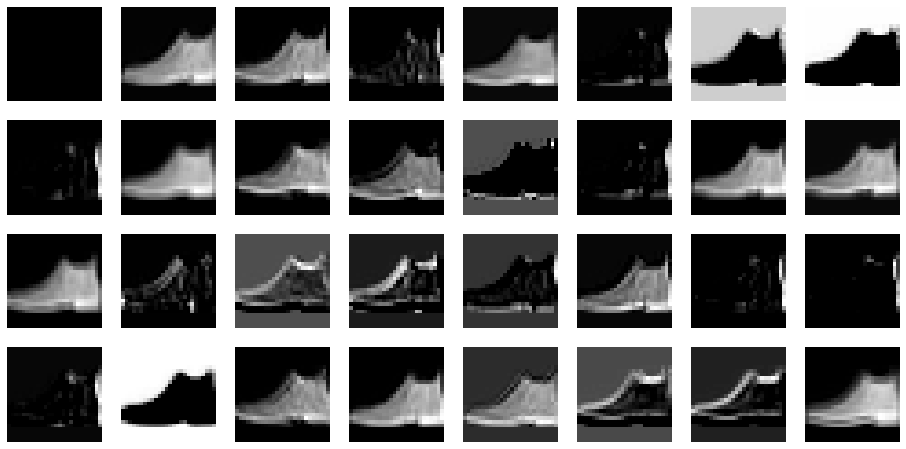

In [ ]:
#visualizando as ativações da primeira camada
layer = outputs[0].reshape(26, 26, -1)
layer = normalize(layer)
print(layer.shape)
fig, axes = plt.subplots(nrows=4, ncols=8, figsize=(16,8))

for ax, i in zip(axes.flat, range(32)):
  ax.imshow(layer[i, :, :], cmap='gray')
  ax.axis('off')

255.0 0.0
(32, 13, 13)


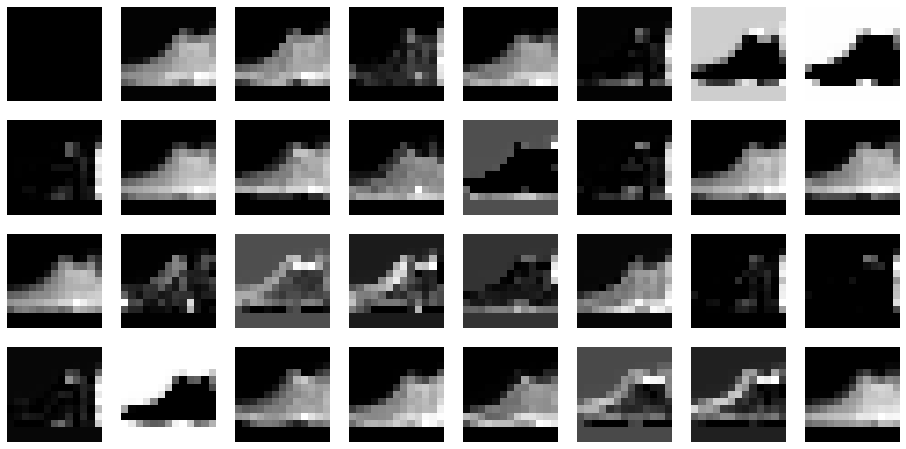

In [ ]:
layer = outputs[1].reshape(13, 13, -1)
layer = normalize(layer)
print(layer.shape)

fig, axes = plt.subplots(nrows=4, ncols=8, figsize=(16,8))

for ax, i in zip(axes.flat, range(32)):
  ax.imshow(layer[i, :, :], cmap='gray')
  ax.axis('off')

255.0 0.0


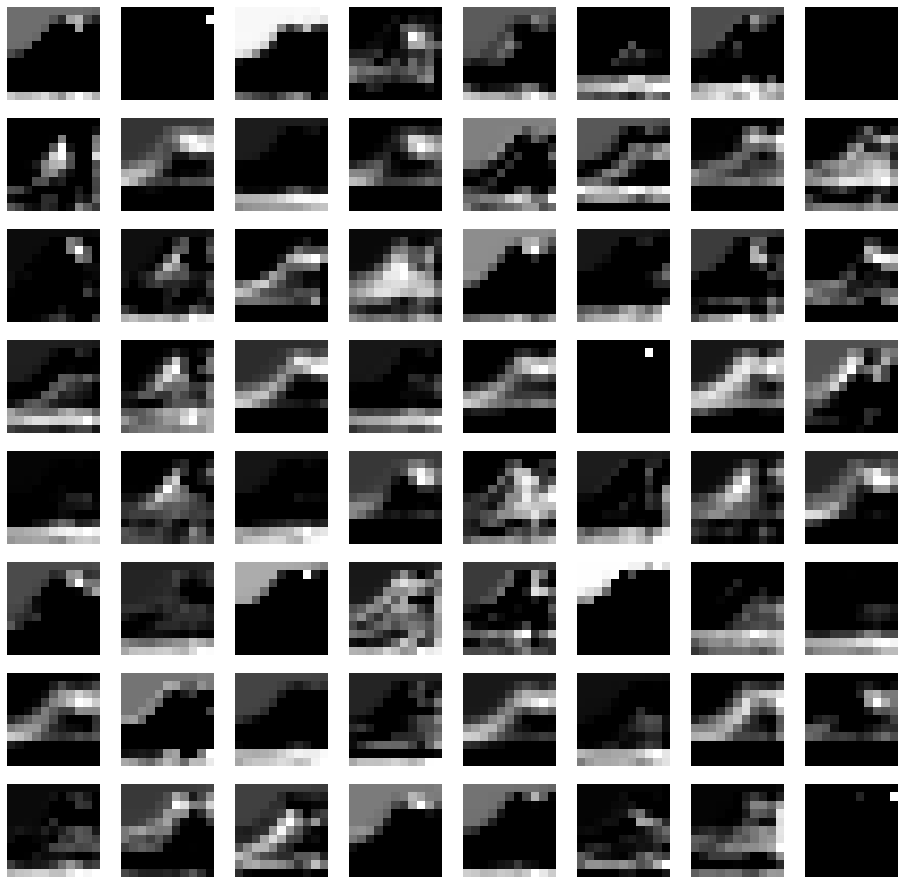

In [ ]:
layer = outputs[2].reshape(11, 11, -1)
layer = normalize(layer)

fig, axes = plt.subplots(nrows=8, ncols=8, figsize=(16,16))

for ax, i in zip(axes.flat, range(64)):
  ax.imshow(layer[i, :, :], cmap='gray')
  ax.axis('off')

In [ ]:
for act in outputs[3].reshape(-1):
  print(f'{act:.5f}')

0.00000
0.00000
0.00000
0.00001
0.00000
0.01086
0.00002
0.25642
0.01003
0.72265


Outra abordagem é o GRAD-CAM

https://keras.io/examples/vision/grad_cam/